Import and processing

In [1]:
#import libraries
import pandas as pd
import numpy as np
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import preprocessing
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [2]:
#upload dataset, drop rows with missing values, drop columns that would be impossible to determine upon presentation or aggregate features
uploaded = files.upload()
df = pd.read_csv(open("SepsisBiomarkersProcessed.csv", "r"))
df = df.drop(columns=['Unnamed: 0'])
df = df.replace(-1,np.NaN)
df = df.dropna()
df = df.drop(columns = ['28 days survival (yes/no)', 'Positve blood culture (yes/no)', 'Proven bacterial infection (yes/no)', 'Bacterial sepsis using Sepsis-2 criteria (yes/no/cannot be determined)', 'Severe bacterial sepsis/septic shock using Sepsis-2 criteria (yes/no/cannot be determined)', 'Intensive care unit (yes/no)', 'Systemic inflammatory response syndrome (yes/no/cannot be determined)', 'SOFA score ≥2 (yes/no)'])
df_features = df.drop('Bacterial sepsis using Sepsis-3 criteria (yes/no)',axis=1)

Saving SepsisBiomarkersProcessed.csv to SepsisBiomarkersProcessed.csv


Models

In [3]:
#simple logistic regression model
def logistic_regression_model(df_arg, train_size):
  X_train, X_test, y_train, y_test = train_test_split(df_arg.drop('Bacterial sepsis using Sepsis-3 criteria (yes/no)',axis=1), 
                                                    df_arg['Bacterial sepsis using Sepsis-3 criteria (yes/no)'], 
                                                    test_size=1-train_size, 
                                                    random_state = 10000)
  model = LogisticRegression(max_iter = 1000)
  model.fit(X_train, y_train)
  predictions = model.predict(X_test)

  print(classification_report(y_test,predictions))

  return model

In [4]:
#train model and assign to variable
logreg_model = logistic_regression_model(df, 0.8)

              precision    recall  f1-score   support

         0.0       0.71      0.86      0.78       146
         1.0       0.67      0.45      0.54        93

    accuracy                           0.70       239
   macro avg       0.69      0.65      0.66       239
weighted avg       0.69      0.70      0.68       239



In [5]:
#format for predictions
single_prediction = np.array([50.0, 1, 100, 33.0, 93.0, 74.0, 38, 87, 15, 300.0, 0.46, 10.7, 1.86]).reshape(1, -1)
logreg_model.predict(single_prediction)

array([0.])

In [6]:
def NN_function(df_arg, train_size, number_of_layers, number_of_epochs, activation_function):
  
  dfx = df_arg.drop('Bacterial sepsis using Sepsis-3 criteria (yes/no)',axis=1)
  dfy = df_arg['Bacterial sepsis using Sepsis-3 criteria (yes/no)']
  X_train, X_test, y_train, y_test = train_test_split(dfx, dfy, test_size=1-train_size, random_state = 10000)  

  trainxr = X_train.values.astype('float32')
  testxr = X_test.values.astype('float32')
  trainy = y_train.values.astype('float32')
  testy = y_test.values.astype('float32')

  model = keras.Sequential()

  n_layer = keras.layers.experimental.preprocessing.Normalization()
  n_layer.adapt(trainxr)

  model.add(n_layer)
  
  if (number_of_layers!=1):
    for i in range(number_of_layers-1):
      model.add(layers.Dense(32, activation=activation_function))
    model.add(layers.Dense(32, activation=activation_function))

  model.add(layers.Dense(1, activation='sigmoid'))

  opt = keras.optimizers.Adam(lr=0.0005)
  model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

  history = model.fit(trainxr, trainy, epochs=number_of_epochs, batch_size=64, validation_data=(testxr, testy), verbose=2, shuffle=True)

  #plot the loss values 
  plt.plot(history.history['loss'], label='Training loss')
  plt.plot(history.history['val_loss'], label='Test loss')
  plt.legend()
  plt.show()

  #evaluation
  prediction_vector = model.predict(testxr)
  index = 0
  correct = 0
  for i in np.around(prediction_vector):
    if i == testy[index]:
      correct+=1
    index+=1
  print("Accuracy:", correct/(index+1))

  print(model.summary())

  return model

Epoch 1/150
14/14 - 1s - loss: 0.6361 - accuracy: 0.6492 - val_loss: 0.6625 - val_accuracy: 0.5987
Epoch 2/150
14/14 - 0s - loss: 0.6295 - accuracy: 0.6492 - val_loss: 0.6545 - val_accuracy: 0.5987
Epoch 3/150
14/14 - 0s - loss: 0.6251 - accuracy: 0.6492 - val_loss: 0.6499 - val_accuracy: 0.5987
Epoch 4/150
14/14 - 0s - loss: 0.6211 - accuracy: 0.6492 - val_loss: 0.6455 - val_accuracy: 0.5987
Epoch 5/150
14/14 - 0s - loss: 0.6166 - accuracy: 0.6492 - val_loss: 0.6408 - val_accuracy: 0.5987
Epoch 6/150
14/14 - 0s - loss: 0.6123 - accuracy: 0.6503 - val_loss: 0.6347 - val_accuracy: 0.6020
Epoch 7/150
14/14 - 0s - loss: 0.6079 - accuracy: 0.6536 - val_loss: 0.6303 - val_accuracy: 0.6054
Epoch 8/150
14/14 - 0s - loss: 0.6031 - accuracy: 0.6570 - val_loss: 0.6249 - val_accuracy: 0.6120
Epoch 9/150
14/14 - 0s - loss: 0.5987 - accuracy: 0.6603 - val_loss: 0.6181 - val_accuracy: 0.6254
Epoch 10/150
14/14 - 0s - loss: 0.5939 - accuracy: 0.6693 - val_loss: 0.6132 - val_accuracy: 0.6388
Epoch 11/

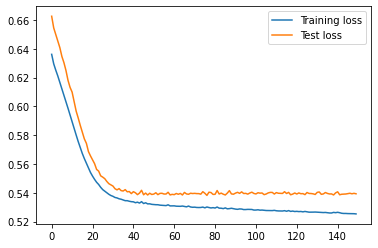

Accuracy: 0.72
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization (Normalization (None, 13)                27        
_________________________________________________________________
dense (Dense)                (None, 32)                448       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 1,564
Trainable params: 1,537
Non-trainable params: 27
_________________________________________________________________
None


In [7]:
nn_model = NN_function(df, 0.75, 2, 150, 'sigmoid')

In [8]:
#leftover code on how to make a set of predictions, the function returns a probability as to how likely it believes the person is septic
#uncomment the string literal to make this work
'''
dfnv_x = df.drop('Bacterial sepsis using Sepsis-3 criteria (yes/no)',axis=1)
dfnv_y = df['Bacterial sepsis using Sepsis-3 criteria (yes/no)']
X_train, X_test, y_train, y_test = train_test_split(dfnv_x, dfnv_y, test_size=0.25, random_state = 10000)  
trainxr = X_train.values.astype('float32')
testxr = X_test.values.astype('float32')
trainy = y_train.values.astype('float32')
testy = y_test.values.astype('float32')

prediction_vector = np.around(nn_model.predict(testxr))
prediction_vector
'''

"\ndfnv_x = df.drop('Bacterial sepsis using Sepsis-3 criteria (yes/no)',axis=1)\ndfnv_y = df['Bacterial sepsis using Sepsis-3 criteria (yes/no)']\nX_train, X_test, y_train, y_test = train_test_split(dfnv_x, dfnv_y, test_size=0.25, random_state = 10000)  \ntrainxr = X_train.values.astype('float32')\ntestxr = X_test.values.astype('float32')\ntrainy = y_train.values.astype('float32')\ntesty = y_test.values.astype('float32')\n\nprediction_vector = np.around(nn_model.predict(testxr))\nprediction_vector\n"

Base SHAP for logistic regression

In [9]:
!pip install shap
import shap

     |████████████████████████████████| 358kB 6.4MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491619 sha256=ab60ebf30657b81c2986ae7b4a7131e88087d860e578b080ef5ff3841f7351ee
  Stored in directory: /root/.cache/pip/wheels/15/27/f5/a8ab9da52fd159aae6477b5ede6eaaec69fd130fa0fa59f283
Successfully built shap


In [10]:
def get_df_normal(df_arg):
  np_values_array = df_arg.values
  min_max_scaler = preprocessing.MinMaxScaler()
  df_scaled_values = min_max_scaler.fit_transform(np_values_array)
  df_normal = pd.DataFrame(df_scaled_values, columns = df_arg.columns)
  return df_normal

def g(X):
  return logreg_model.predict_proba(X)

df_normal = get_df_normal(df)
df_normal_features = df_normal.drop('Bacterial sepsis using Sepsis-3 criteria (yes/no)',axis=1)

logreg_explainer = shap.KernelExplainer(g, df_features.sample(n=50, random_state=1))

In [11]:
'''
def get_df_normal(df_arg):
  np_values_array = df_arg.values
  min_max_scaler = preprocessing.MinMaxScaler()
  df_scaled_values = min_max_scaler.fit_transform(np_values_array)
  df_normal = pd.DataFrame(df_scaled_values, columns = df_arg.columns)
  return df_normal

def g(X):
  probs = logreg_model.predict_proba(X)
  new_probs = []
  for i in probs:
    new_probs.append(i[1])
  return np.array(new_probs)

df_normal = get_df_normal(df)
df_normal_features = df_normal.drop('Bacterial sepsis using Sepsis-3 criteria (yes/no)',axis=1)

logreg_explainer = shap.KernelExplainer(g, df_features.sample(n=50, random_state=1))
'''

"\ndef get_df_normal(df_arg):\n  np_values_array = df_arg.values\n  min_max_scaler = preprocessing.MinMaxScaler()\n  df_scaled_values = min_max_scaler.fit_transform(np_values_array)\n  df_normal = pd.DataFrame(df_scaled_values, columns = df_arg.columns)\n  return df_normal\n\ndef g(X):\n  probs = logreg_model.predict_proba(X)\n  new_probs = []\n  for i in probs:\n    new_probs.append(i[1])\n  return np.array(new_probs)\n\ndf_normal = get_df_normal(df)\ndf_normal_features = df_normal.drop('Bacterial sepsis using Sepsis-3 criteria (yes/no)',axis=1)\n\nlogreg_explainer = shap.KernelExplainer(g, df_features.sample(n=50, random_state=1))\n"

In [12]:
#medium sepsis likelihood
shap.initjs()
shap_values = logreg_explainer.shap_values(df_features.iloc[11,:], nsamples=500)
shap.force_plot(logreg_explainer.expected_value[0], shap_values[0], df_features.iloc[11,:])

In [13]:
#high sepsis likelihood
shap.initjs()
shap_values = logreg_explainer.shap_values(df_features.iloc[911,:], nsamples=500)
shap.force_plot(logreg_explainer.expected_value[0], shap_values[0], df_features.iloc[911,:])

In [14]:
#low sepsis likelihood
shap.initjs()
shap_values = logreg_explainer.shap_values(df_features.iloc[1,:], nsamples=500)
shap.force_plot(logreg_explainer.expected_value[0], shap_values[0], df_features.iloc[1,:])

Base SHAP for sequential model

In [15]:
def f(X):
  Y = nn_model.predict(X)
  Z = 1-nn_model.predict(X)
  Q = np.concatenate((Y,Z),axis=1)
  return Q

nn_explainer = shap.KernelExplainer(f, df_features.sample(n=50, random_state=1))

In [16]:
#medium sepsis likelihood
shap.initjs()
shap_values = nn_explainer.shap_values(df_features.iloc[11,:], nsamples=500)
shap.force_plot(nn_explainer.expected_value[0], shap_values[0], df_features.iloc[11,:])

In [17]:
#high sepsis likelihood
shap.initjs()
shap_values = nn_explainer.shap_values(df_features.iloc[911,:], nsamples=500)
shap.force_plot(nn_explainer.expected_value[0], shap_values[0], df_features.iloc[911,:])

In [18]:
#low sepsis likelihood
shap.initjs()
shap_values = nn_explainer.shap_values(df_features.iloc[1,:], nsamples=500)
shap.force_plot(nn_explainer.expected_value[0], shap_values[0], df_features.iloc[1,:])

Additional SHAP plots for logistic regression

In [33]:
def g2(X):
  return logreg_model.predict_proba(X)[:,1]

In [34]:
#nnX_train, nnX_test, nny_train, nny_test = train_test_split(df_nn, df_nn, test_size=0.25, random_state = 10000) 
med = df_features.median().values.reshape((1,df_features.shape[1]))
logreg_explainer_2 = shap.Explainer(g2, med)
shap_values_logreg = logreg_explainer_2(df_features)

In [31]:
print(shap_values_logreg[1])

.values =
array([ 0.0845296 ,  0.        ,  0.02574741,  0.03770413,  0.01603335,
       -0.00314115, -0.00403664,  0.01029452,  0.01744777,  0.00150034,
        0.00114753, -0.10331913,  0.00367377])

.base_values =
0.7051599202227554

.data =
array([5.40e+01, 0.00e+00, 1.48e+02, 1.80e+01, 9.70e+01, 1.07e+02,
       3.85e+01, 1.39e+02, 9.50e+00, 1.00e+02, 5.00e-02, 3.16e+01,
       1.28e+00])


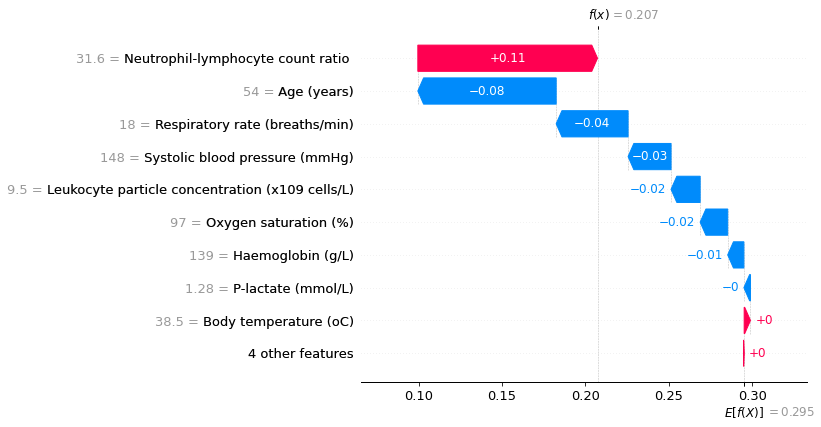

In [35]:
#low sepsis likelihood
shap.initjs()
shap.plots.waterfall(shap_values_logreg[1], max_display=10, show=True)

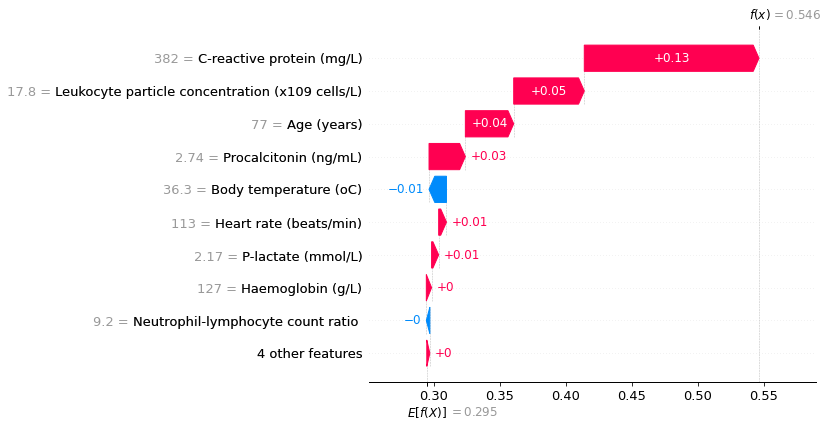

In [36]:
#medium sepsis likelihood
shap.initjs()
shap.plots.waterfall(shap_values_logreg[11], max_display=10, show=True)

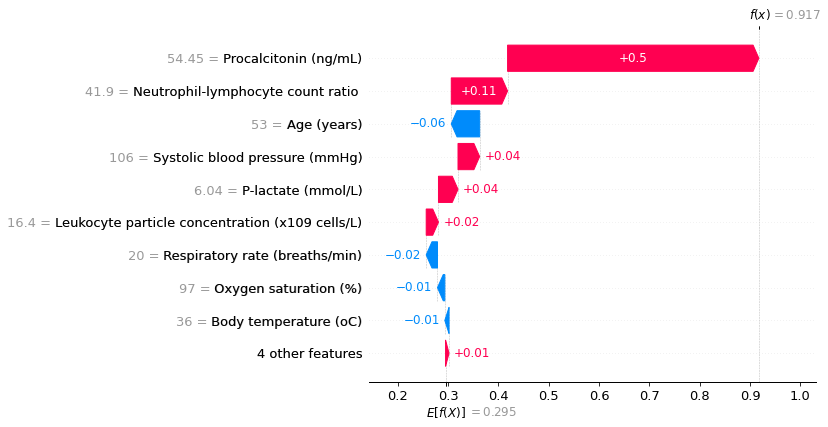

In [37]:
#high sepsis likelihood
shap.initjs()
shap.plots.waterfall(shap_values_logreg[911], max_display=10, show=True)

Additional SHAP plots for sequential model

In [47]:
#i recognize this is pretty redundant and can be done with nn_model.predict, but for the sake of formatting it will be left like this
def f2(X):
  Y = nn_model.predict(X)
  Z = 1-nn_model.predict(X)
  Q = np.concatenate((Y,Z),axis=1)
  return Q[:,0]

In [48]:
#be careful with this block, it takes about 30 minutes to run!
med_n = df_features.median().values.reshape((1,df_features.shape[1]))
nn_explainer_2 = shap.Explainer(f2, med_n)
shap_values_nn = nn_explainer_2(df_features)

Permutation explainer: 1195it [18:00,  1.11it/s]


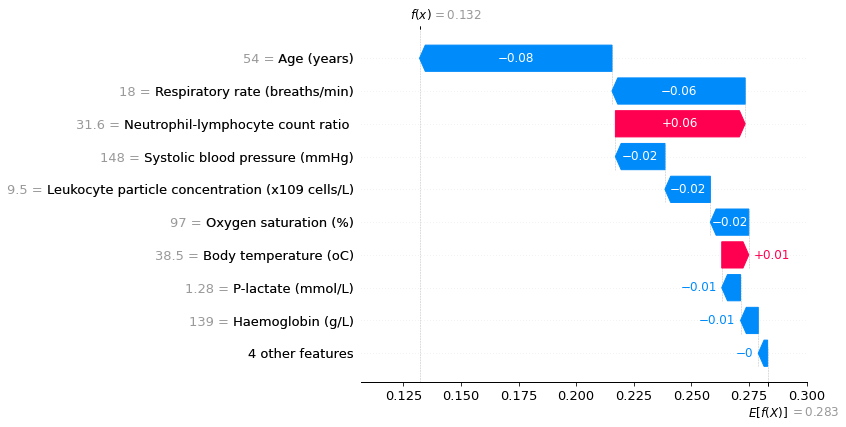

In [49]:
#low sepsis likelihood
shap.initjs()
shap.plots.waterfall(shap_values_nn[1], max_display=10, show=True)

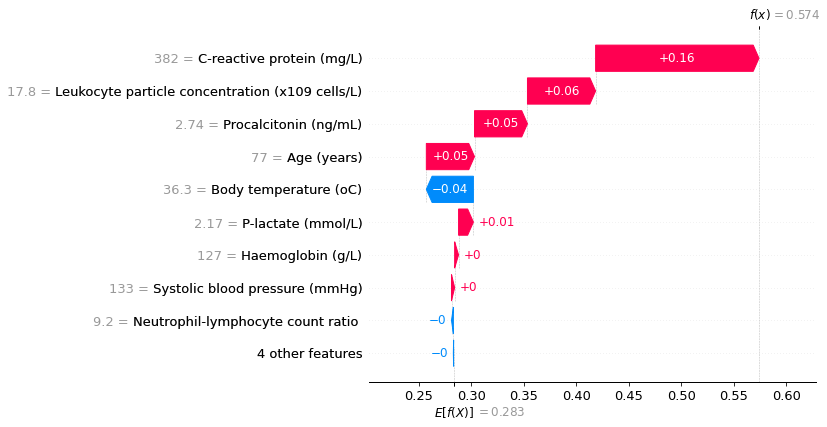

In [50]:
#medium sepsis likelihood
shap.initjs()
shap.plots.waterfall(shap_values_nn[11], max_display=10, show=True)


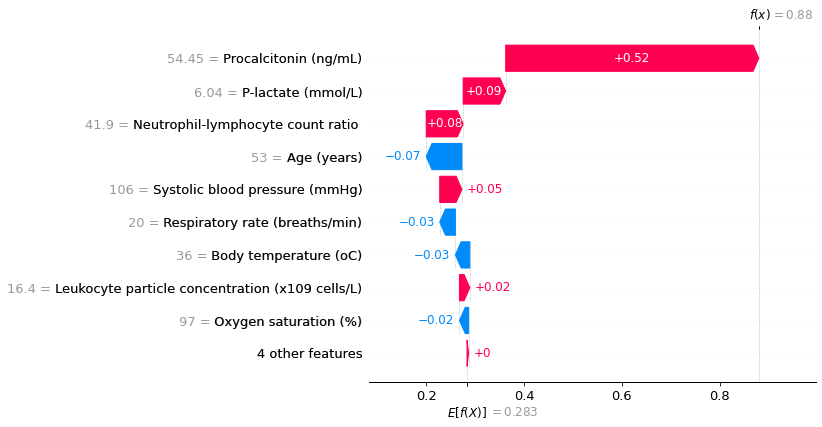

In [51]:
#high sepsis likelihood
shap.initjs()
shap.plots.waterfall(shap_values_nn[911], max_display=10, show=True)

SHAP explanations for entire dataset (logistic regression)


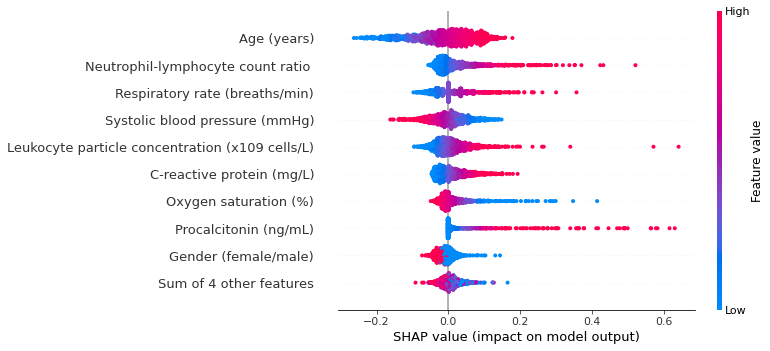

In [52]:
shap.initjs()
shap.plots.beeswarm(shap_values_logreg)

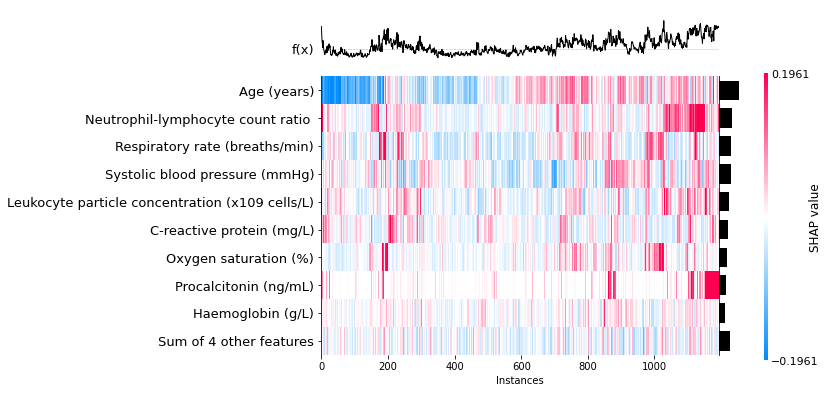

In [53]:
shap.plots.heatmap(shap_values_logreg)

SHAP explanations for entire dataset (sequential model)


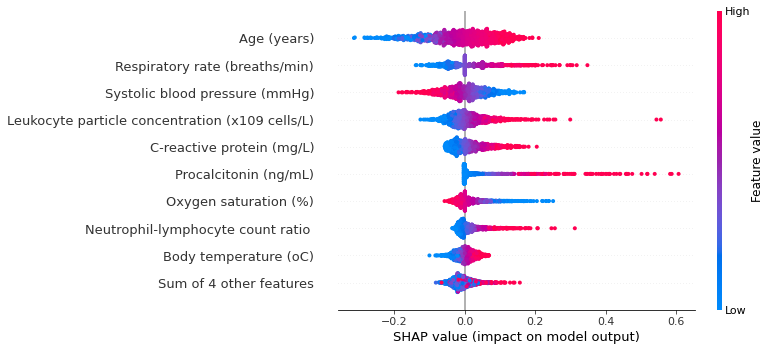

In [54]:
shap.initjs()
shap.plots.beeswarm(shap_values_nn)

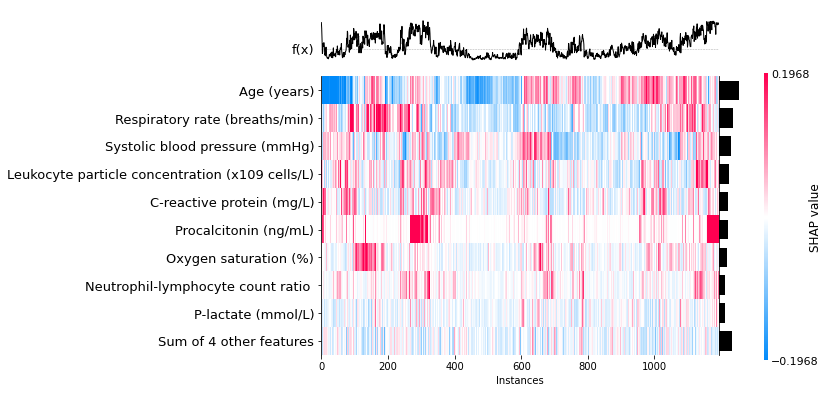

In [55]:
shap.plots.heatmap(shap_values_nn)